# NLP (Natural Language Processing) on Python

This is the notebook that comes with the NLP video!

This lecture is an overview of natural language processing, which consists of combining machine learning techniques with text and using math and statistics to get this text into a format that machine learning algorithms understand!

After completing this talk, you'll get a project using some text data from Yelp!

**need: you may have installed NLTK, in addition to downloading the document for passwords. To download everything with a conda installation, run a cell below.**

conda install nltk

In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


SystemExit: 0

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
messages[10]

"ham\tI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [7]:
for messagem_number, message in enumerate(messages[:15]):
    print(messagem_number, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [8]:
import pandas as pd

In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [11]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [13]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
messages['lenght'] = messages['message'].apply(len)

In [18]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


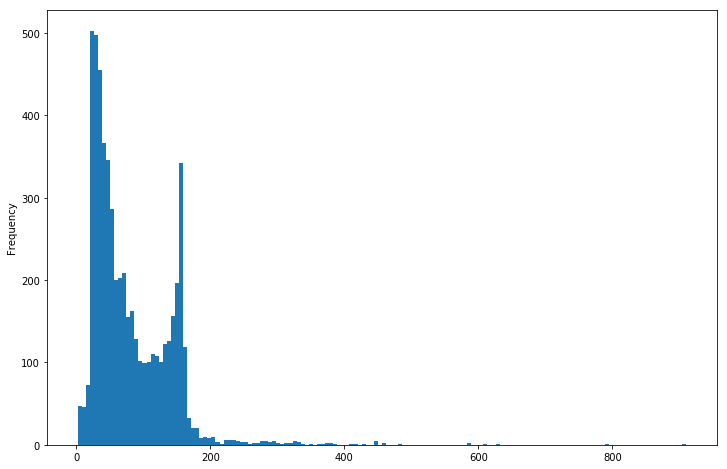

In [21]:
plt.figure(figsize=(12, 8))
messages['lenght'].plot(kind='hist', bins=150)

In [22]:
messages.lenght.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: lenght, dtype: float64

In [24]:
messages[messages['lenght'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20ff9940>,
      dtype=object)

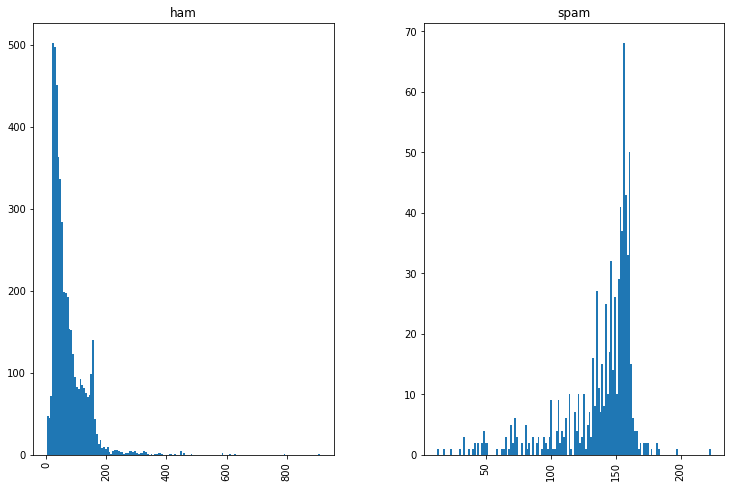

In [27]:
messages.hist(bins=150, column='lenght', by='label', figsize=(12, 8))

In [28]:
import string

In [35]:
mess = 'Example message! There is a punctuation.'

In [36]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
withoutPunctuation = [car for car in mess if car not in string.punctuation]

In [38]:
withoutPunctuation

['E',
 'x',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'T',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [39]:
withoutPunctuation = ''.join(withoutPunctuation)

In [40]:
withoutPunctuation

'Example message There is a punctuation'

In [41]:
from nltk.corpus import stopwords

In [43]:
# Common words that undermine the model. Delete with "stopwords"

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
tst = 'Sample message! Notice: it has pinctuation!!!'

In [45]:
clean_mess = [word for word in tst.split() if word.lower() not in stopwords.words('english')]

In [46]:
clean_mess

['Sample', 'message!', 'Notice:', 'pinctuation!!!']

In [61]:
def text_process(mess):
    # whitout punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    # join words
    nopunc = ''.join(nopunc)
    
    sms = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return sms

In [62]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [63]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [70]:
print(len(bow_transformer.vocabulary_))

11425


In [71]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [72]:
bow4 = bow_transformer.transform([message4])

In [73]:
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [75]:
print(bow_transformer.get_feature_names()[9554])

say


In [77]:
messages_bow = bow_transformer.transform(messages['message'])

In [78]:
print(messages_bow.shape)

(5572, 11425)


In [79]:
print(messages_bow.nnz)

50548


In [81]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [82]:
from sklearn.feature_extraction.text import TfidfTransformer

In [85]:
tfidf_transform = TfidfTransformer()

In [88]:
tfidf_transform = tfidf_transform.fit(messages_bow)

In [89]:
tfidf4 = tfidf_transform.transform(bow4)

In [90]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [92]:
print(tfidf_transform.idf_[bow_transformer.vocabulary_['university']])

8.527076498901426


In [94]:
from sklearn.naive_bayes import MultinomialNB

In [95]:
messages_tfidf = tfidf_transform.transform(messages_bow)

In [96]:
span_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [98]:
print('Predict:', span_detect_model.predict(tfidf4)[0])
print('Waiting:', messages['label'][3])

Predict: ham
Waiting: ham


In [117]:
from sklearn.model_selection import train_test_split

In [118]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

In [134]:
from sklearn.pipeline import Pipeline

In [128]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=text_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())])

In [129]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a2050f488>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [130]:
pred = pipeline.predict(msg_test)

In [131]:
from sklearn.metrics import classification_report

In [133]:
print(classification_report(pred, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1006
        spam       0.73      1.00      0.84       109

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.97      1115



In [135]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
pipeline2 = Pipeline([('bow', CountVectorizer(analyzer=text_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', RandomForestClassifier())])

In [138]:
pipeline2.fit(msg_train, label_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a2050f488>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [140]:
pred2 = pipeline2.predict(msg_test)

In [141]:
print(classification_report(pred2, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1002
        spam       0.75      1.00      0.86       113

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.88      0.98      0.92      1115
weighted avg       0.98      0.97      0.97      1115

